In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Pathname
path = r'C:\Users\Anwender\Desktop\29-11-2020 Instacart Basket Analysis'

In [3]:
# Import Data
df_ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9_ords_prods_custs_visual_Data.pkl'))

In [4]:
# Display table
df_ords_prods_custs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196.0,1.0,Soda,77.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,Soda,77.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,Soda,77.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,Soda,77.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,Soda,77.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
# Crosstabs are a common tool for conducting data checks in Python. Think of them as Python’s version of Excel’s pivot tables. Let’s try creating one using an example from Instacart.
# From the checks you conducted on your Instacart data, you know that there are some missing values in the “days_since_prior_order” column. You can only assume that these missing values were caused by the fact that there can’t be any days before a first order, as this is what makes the most sense. Using the head() and tail() functions also confirms this assumption. However, you still can’t be sure that all the missing values in this column exist for this reason.
# A better way to check this would be to create a crosstab between the “days_since_prior_order” column and the “order_number” column. Then, if all the missing values from “days_since_prior_order” fall where the order number is equal to 1, you can consider your hypothesis confirmed and move on with the rest of your analysis.
# This crosstab can be created via the following code:
crosstab = pd.crosstab(df_ords_prods_custs['days_since_prior_order'], df_ords_prods_custs['order_number'], dropna = False)

In [6]:
# The table this creates will be stored in the object crosstab. Considering its size, it may be cumbersome to view directly in Python. In cases like this, you can copy the table straight to your clipboard, allowing you to then paste it into Excel for easy viewing. To do so, type the following command:
crosstab.to_clipboard()

# QUESTIONS AND ANSWERs for task 4.10

In [7]:
# QUESTION 1, Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.
df_ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9_orders_products_customer_merged_Data.pkl'))

In [8]:
# displaying the shape
df_ords_prods_custs_merge.shape

(32641268, 31)

In [9]:
# displaying the datatypes
df_ords_prods_custs_merge.dtypes

order_id                   float64
user_id                    float64
order_number               float64
orders_day_of_week         float16
order_hour_of_day          float16
days_since_prior_order     float64
product_id                 float64
add_to_cart_order          float64
product_name              category
aisle_id                   float64
department_id              float16
prices                     float16
price_range_loc           category
busiest_day               category
Busiest_days              category
busiest_period_of_day     category
max_order                  float64
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float16
frequency_flag            category
surname                     object
gender                    category
state                       object
age                          int64
date_joined                 object
n_dependants                 int16
fam_status          

In [10]:
# displaying the head of the data
df_ords_prods_custs_merge.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196.0,1.0,Soda,77.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [11]:
# QUESTION 2, Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
# Information such as Surname, Age, number of dependants and family status are all to be considered as personally identifiable information (PII) and should be treated with proper security protocols. i can also remove them by making a copy of these two columns using - df_ords_prods_custs_merge = df_ords_prods_cust_merged.drop(columns = ['first_name','sur_name'])

# QUESTION 3, The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
# Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
# Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [12]:
# checking the states column
df_ords_prods_custs_merge['state'].value_counts(dropna = False)

Pennsylvania            671781
California              664472
Rhode Island            661705
Georgia                 661136
New Mexico              659231
Arizona                 658597
North Carolina          656372
Oklahoma                656318
Alaska                  653070
Minnesota               652467
Massachusetts           651063
Wyoming                 648970
Virginia                646146
Missouri                645366
Texas                   645094
Colorado                643864
Maine                   643218
North Dakota            643040
Alabama                 642694
Louisiana               642222
Kansas                  642064
Delaware                641521
South Carolina          641466
Oregon                  641009
Arkansas                640781
New York                640750
Nevada                  640740
Montana                 639881
South Dakota            638405
Illinois                637520
Hawaii                  637490
Washington              637488
Mississi

In [13]:
# Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
# Creating the regions column
result =[]

for state in df_ords_prods_custs_merge['state']:
    if (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Kansas') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri'):
        result.append('Midwest')
    elif (state == 'Deleware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        result.append('South')
    elif (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state =='New Jersey'):
        result.append('Northeast')
    else:
        result.append('West')

In [14]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Mi

In [15]:
# Create a new column within dataframe and set it equal to result
df_ords_prods_custs_merge['region'] = result

In [16]:
# Checking the count for all regions
df_ords_prods_custs_merge['region'].value_counts(dropna = False)

South        10229198
West          8994703
Midwest       7652535
Northeast     5764832
Name: region, dtype: int64

In [17]:
# confirmation by grouping
df_ords_prods_custs_merge[['user_id', 'state', 'region']].head(5)

,user_id,state,region
0,1.0,Alabama,South
1,1.0,Alabama,South
2,1.0,Alabama,South
3,1.0,Alabama,South
4,1.0,Alabama,South


In [18]:
df_ords_prods_custs_merge[['user_id', 'state', 'region']].tail(5)

,user_id,state,region
32641263,206204.0,Georgia,South
32641264,206204.0,Georgia,South
32641265,206204.0,Georgia,South
32641266,206204.0,Georgia,South
32641267,206204.0,Georgia,South


In [19]:
# check the length accuracy of state and comfirming the regions
len(df_ords_prods_custs_merge['state'])

32641268

In [20]:
df_ords_prods_custs_merge.shape

(32641268, 32)

In [21]:
# check the datatype 
df_ords_prods_custs_merge[['region']].dtypes

region    object
dtype: object

In [22]:
# change the datatype to category
df_ords_prods_custs_merge['region'] = df_ords_prods_custs_merge['region'].astype('category')

In [23]:
# CONFIRM
df_ords_prods_custs_merge[['region']].dtypes

region    category
dtype: object

In [24]:
# Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
# creating a crosstab
crosstab_regionspending = pd.crosstab(df_ords_prods_custs_merge['region'], df_ords_prods_custs_merge['spending_flag'], dropna = False)

In [25]:
# check for the result
crosstab_regionspending

spending_flag,High Spender,Low Spender
region,,
Midwest,157347,7495188
Northeast,109159,5655673
South,194971,10034227
West,178558,8816145


In [26]:
crosstab_regionspending.to_clipboard()

In [27]:
# checking for the percentage of high spender in the midwest 
157347 + 7495188

7652535

In [28]:
Midwest_high = (157347 / 7652535)*100

In [29]:
Midwest_high

2.05614218033632

In [30]:
# checking for the percentage of high spender in the Northeast
109159 + 5655673

5764832

In [31]:
Northeast_high = (109159 / 5764832)*100

In [32]:
Northeast_high

1.8935330639297037

In [33]:
# checking for the percentage of high spender in the South
194971 + 10034227

10229198

In [34]:
South_high = (194971 / 10229198)*100

In [35]:
South_high

1.906024304153659

In [36]:
# checking for the percentage of high spender in the West
178558 + 8816145

8994703

In [37]:
West_high = (178558 / 8994703)*100

In [38]:
West_high

1.985146146570932

In [39]:
# approximating the decimal
format(Midwest_high, '.1f')

'2.1'

In [40]:
# approximating the decimal
format(Northeast_high, '.1f')

'1.9'

In [41]:
# aproximating the decimal
format(South_high, '.1f')

'1.9'

In [42]:
# approximating the decimal
format(West_high, '.1f')

'2.0'

In [43]:
# The Midwest has the highest percentage at 2.1%, infact the four regions are similar in high percentage.

# QUESTION 4,The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
# Creating a low-activity flag for customers with less than 5 orders

In [44]:
# QUESTION 4,The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
# Creating a low-activity flag for customers with less than 5 orders
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['max_order'] < 5, 'exclusion_flag'] = 'low activity customer'

In [45]:
# Creating a low-activity flag customers with more than 5 orders
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['max_order'] >= 5, 'exclusion_flag'] = 'non low activity customer'

In [46]:
# Check exclusion flag
df_ords_prods_custs_merge['exclusion_flag'].value_counts(dropna = False)

non low activity customer    31929979
low activity customer          711289
Name: exclusion_flag, dtype: int64

In [47]:
# checking the min and max
df_ords_prods_custs_merge['max_order'].min()

4.0

In [48]:
df_ords_prods_custs_merge['max_order'].max()

100.0

In [49]:
df_ords_prods_custs_merge[['max_order', 'exclusion_flag']].tail(5)

,max_order,exclusion_flag
32641263,5.0,non low activity customer
32641264,5.0,non low activity customer
32641265,5.0,non low activity customer
32641266,5.0,non low activity customer
32641267,5.0,non low activity customer


In [50]:
# Create a subset with low activity to show only orders that are not more than 5
df_ords_prods_custs_low_activity = df_ords_prods_custs_merge[df_ords_prods_custs_merge['exclusion_flag']=='low activity customer']

In [51]:
# Check 
df_ords_prods_custs_low_activity['max_order'].value_counts()

4.0    711289
Name: max_order, dtype: int64

In [52]:
df_ords_prods_custs_low_activity[['max_order', 'exclusion_flag']].tail(5)

,max_order,exclusion_flag
32640096,4.0,low activity customer
32640097,4.0,low activity customer
32640098,4.0,low activity customer
32640099,4.0,low activity customer
32640100,4.0,low activity customer


In [53]:
# checking the data
df_ords_prods_custs_low_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag
1525,520620.0,120.0,1.0,3.0,11.0,NaN,196.0,2.0,Soda,77.0,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,low activity customer
1526,3273029.0,120.0,3.0,2.0,8.0,19.0,196.0,2.0,Soda,77.0,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,low activity customer
1527,520620.0,120.0,1.0,3.0,11.0,NaN,46149.0,1.0,Zero Calorie Cola,77.0,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,low activity customer
1528,3273029.0,120.0,3.0,2.0,8.0,19.0,46149.0,1.0,Zero Calorie Cola,77.0,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,low activity customer
1529,961032.0,120.0,4.0,2.0,9.0,30.0,NaN,NaN,NaN,NaN,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,low activity customer


In [54]:
df_ords_prods_custs_low_activity.shape

(711289, 33)

In [55]:
#Confirm
df_ords_prods_custs_merge.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag
32641263,1438269.0,206204.0,1.0,1.0,11.0,NaN,17027.0,6.0,Avocado Roll,13.0,...,Female,Georgia,26,9/3/2017,2,married,47024,both,South,non low activity customer
32641264,1380497.0,206204.0,4.0,4.0,15.0,25.0,30328.0,17.0,Large Household Gloves,114.0,...,Female,Georgia,26,9/3/2017,2,married,47024,both,South,non low activity customer
32641265,2511735.0,206204.0,2.0,5.0,8.0,11.0,12240.0,7.0,Vanilla Protein Almond Milk,91.0,...,Female,Georgia,26,9/3/2017,2,married,47024,both,South,non low activity customer
32641266,2511735.0,206204.0,2.0,5.0,8.0,11.0,1402.0,14.0,Plain Soymilk Creamer,91.0,...,Female,Georgia,26,9/3/2017,2,married,47024,both,South,non low activity customer
32641267,2511735.0,206204.0,2.0,5.0,8.0,11.0,668.0,12.0,Chicken Liver Paté Canned Cat Food,41.0,...,Female,Georgia,26,9/3/2017,2,married,47024,both,South,non low activity customer


In [56]:
crosstab_region_exflag = pd.crosstab(df_ords_prods_custs_merge['region'], df_ords_prods_custs_merge['exclusion_flag'], dropna = False)

In [57]:
# using crosstab 
crosstab_region_exflag

exclusion_flag,low activity customer,non low activity customer
region,,
Midwest,165679,7486856
Northeast,127622,5637210
South,223380,10005818
West,194608,8800095


In [58]:
crosstab_region_exflag.to_clipboard()

In [59]:
df_ords_prods_custs_low_activity[['max_order', 'exclusion_flag']].head(5)

,max_order,exclusion_flag
1525,4.0,low activity customer
1526,4.0,low activity customer
1527,4.0,low activity customer
1528,4.0,low activity customer
1529,4.0,low activity customer


In [60]:
# Export subset for low-activity customers
df_ords_prods_custs_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_producsts_custs_low_activity_customers.pickle'))

# QUESTION 5, The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [61]:
# Check data types
df_ords_prods_custs_merge.dtypes

order_id                   float64
user_id                    float64
order_number               float64
orders_day_of_week         float16
order_hour_of_day          float16
days_since_prior_order     float64
product_id                 float64
add_to_cart_order          float64
product_name              category
aisle_id                   float64
department_id              float16
prices                     float16
price_range_loc           category
busiest_day               category
Busiest_days              category
busiest_period_of_day     category
max_order                  float64
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float16
frequency_flag            category
surname                     object
gender                    category
state                       object
age                          int64
date_joined                 object
n_dependants                 int16
fam_status          

In [62]:
df_ords_prods_custs_merge['exclusion_flag'] = df_ords_prods_custs_merge['exclusion_flag'].astype('category')

In [63]:
df_ords_prods_custs_merge[['region', 'exclusion_flag']].dtypes

region            category
exclusion_flag    category
dtype: object

In [64]:
df_ords_prods_custs_merge.shape

(32641268, 33)

# Creating profiling variables

In [65]:
# Create a profiling variable based on age
df_ords_prods_custs_merge['age'].min()

18

In [66]:
df_ords_prods_custs_merge['age'].max()

81

In [67]:
df_ords_prods_custs_merge['age'].value_counts().sort_index()

18    504085
19    523536
20    506558
21    516217
22    517624
       ...  
77    505908
78    498941
79    533539
80    518854
81    513068
Name: age, Length: 64, dtype: int64

In [68]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['age'] < 24, 'Age_classification'] = '<24'
df_ords_prods_custs_merge.loc[(df_ords_prods_custs_merge['age'] >= 25) & (df_ords_prods_custs_merge['age'] <= 40), 'Age_classification'] = '25-40'
df_ords_prods_custs_merge.loc[(df_ords_prods_custs_merge['age'] >= 41) & (df_ords_prods_custs_merge['age'] <= 56), 'Age_classification'] = '41-56'
df_ords_prods_custs_merge.loc[(df_ords_prods_custs_merge['age'] >= 57) & (df_ords_prods_custs_merge['age'] <= 66), 'Age_classification'] = '57-66'
df_ords_prods_custs_merge.loc[(df_ords_prods_custs_merge['age'] >= 67) & (df_ords_prods_custs_merge['age'] <= 75), 'Age_classification'] = '67-75'
df_ords_prods_custs_merge.loc[(df_ords_prods_custs_merge['age'] >= 76) & (df_ords_prods_custs_merge['age'] <= 93), 'Age_classification'] = '76-93'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['age'] >= 94, 'Age_classification'] = '94+'

In [69]:
# Confirm
df_ords_prods_custs_merge['Age_classification'].value_counts().sort_index()

25-40    8155858
41-56    8224940
57-66    4994445
67-75    4594745
76-93    3072311
<24      3086339
Name: Age_classification, dtype: int64

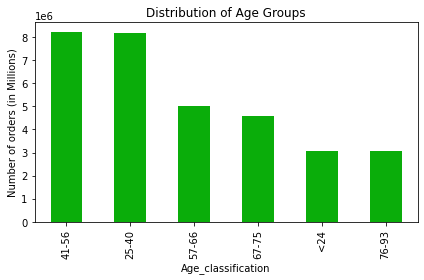

In [70]:
#Age Bar chart
Age_bar = df_ords_prods_custs_merge['Age_classification'].value_counts().plot.bar(color =['#0AAD0A'], xlabel= 'Age_classification', ylabel= 'Number of orders (in Millions)', title = 'Distribution of Age Groups')
plt.tight_layout()

In [71]:
Age_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'age_group.png'))

In [72]:
df_ords_prods_custs_merge[['age', 'Age_classification']].tail()

,age,Age_classification
32641263,26,25-40
32641264,26,25-40
32641265,26,25-40
32641266,26,25-40
32641267,26,25-40


In [73]:
age_family = pd.crosstab(df_ords_prods_custs_merge['Age_classification'], df_ords_prods_custs_merge['fam_status'], dropna = False)

In [74]:
age_family

fam_status,divorced/widowed,living with parents and siblings,married,single
Age_classification,,,,
25-40,0,0,6097955,2057903
41-56,0,0,6191515,2033425
57-66,892810,0,3698068,403567
67-75,1134313,0,3460432,0
76-93,764977,0,2307334,0
<24,0,1561916,772728,751695


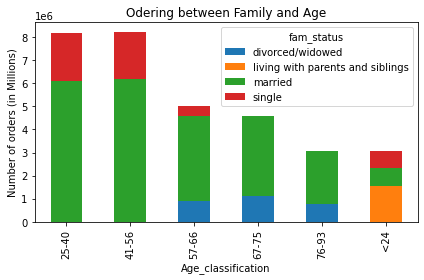

In [75]:
# Age and family bar chart
age_family_stack = age_family.plot.bar(title = 'Odering between Family and Age', xlabel= 'Age_classification', ylabel= 'Number of orders (in Millions)', stacked = True)
plt.tight_layout()

In [76]:
age_family_stack.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'age_familys.png'))

In [77]:
age_depend2 = pd.crosstab(df_ords_prods_custs_merge['Age_classification'], df_ords_prods_custs_merge['n_dependants'], dropna = False)

In [78]:
age_depend2

n_dependants,0,1,2,3
Age_classification,,,,
25-40,2057903,2008289,2060970,2028696
41-56,2033425,2095327,2024487,2071701
57-66,1296377,1200207,1230568,1267293
67-75,1134313,1138259,1171575,1150598
76-93,764977,769319,778169,759846
<24,751695,789328,759687,785629


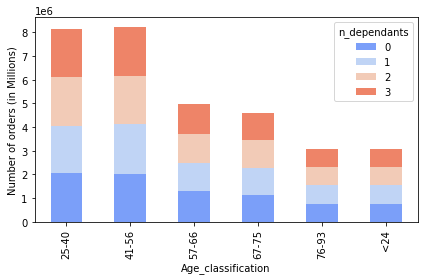

In [79]:
# Age and No dependant
age_depend2 = age_depend2.plot.bar(stacked = True, ylabel= 'Number of orders (in Millions)', color = sns.color_palette('coolwarm',4))
plt.legend(title = 'n_dependants',loc='upper right')
plt.tight_layout()

In [80]:
age_depend2.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'age_ndepend.png')) 

In [81]:
age_loyalty = pd.crosstab(df_ords_prods_custs_merge['Age_classification'], df_ords_prods_custs_merge['loyalty_flag'], dropna = False)

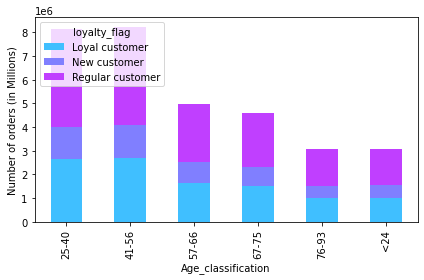

In [82]:
# Age loyalty
age_loyaltyf = age_loyalty.plot.bar(stacked = True, color = sns.color_palette('cool',3), ylabel= 'Number of orders (in Millions)')
plt.legend(title = 'loyalty_flag',loc='upper left')
plt.tight_layout()

In [83]:
age_loyaltyf.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'age_loyal.png')) 

In [84]:
# Create a profiling variable based on income
df_ords_prods_custs_merge['income'].min()

25903

In [85]:
df_ords_prods_custs_merge['income'].max()

593901

In [86]:
df_ords_prods_custs_merge['income'].value_counts().sort_index()

25903      21
25911      29
25937      40
25941      32
25955     393
         ... 
584097    827
590790     55
591089    177
592409    319
593901    641
Name: income, Length: 108012, dtype: int64

In [87]:
# Create income brackets mainly based on current income tax brackets and if-statement with For-loops for income

income = []

for value in df_ords_prods_custs_merge['income']:
    if value <= 25000: 
        income.append('0-025000')
    elif (value > 25000) and (value <= 40000):
        income.append('025000-040000')
    elif (value > 40000) and (value <= 80000):
        income.append('040000-080000')
    elif (value > 80000) and (value <= 120000):
        income.append('080000-120000')
    elif (value > 120000) and (value <= 160000):
        income.append('120000-160000')
    elif (value > 160000) and (value <= 210000):
        income.append('160000-210000')
    elif (value > 210000) and (value <= 523000):
        income.append('210000-523000')
    elif (value > 523000):
        income.append('523000+')
    else: 
        income.append('other')

In [88]:
# Create new imcome_range column and set it equal to income
df_ords_prods_custs_merge['income_range'] = income

In [89]:
# Check results of income_range
df_ords_prods_custs_merge['income_range'].value_counts().sort_index()

025000-040000     1746209
040000-080000     9922631
080000-120000    11336593
120000-160000     7412983
160000-210000     1978622
210000-523000      229572
523000+             14658
Name: income_range, dtype: int64

In [90]:
df_ords_prods_custs_merge[['income', 'income_range']].tail()

,income,income_range
32641263,47024,040000-080000
32641264,47024,040000-080000
32641265,47024,040000-080000
32641266,47024,040000-080000
32641267,47024,040000-080000


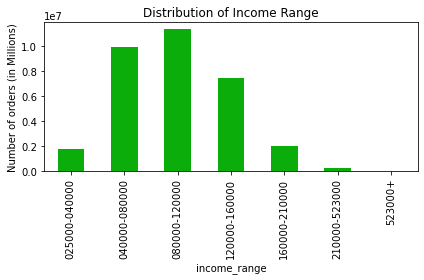

In [91]:
Income_bar = df_ords_prods_custs_merge['income_range'].value_counts().sort_index().plot.bar(color =['#0AAD0A'], xlabel= 'income_range', ylabel= 'Number of orders (in Millions)', title = 'Distribution of Income Range')
plt.tight_layout()

In [92]:
Income_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'income.png'))

In [93]:
age_incomerange = pd.crosstab(df_ords_prods_custs_merge['Age_classification'], df_ords_prods_custs_merge['income_range'], dropna = False)

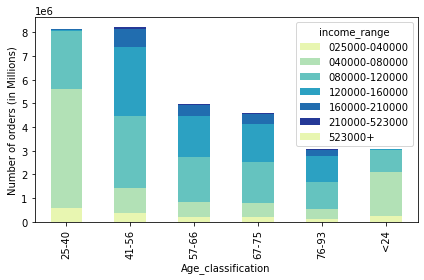

In [94]:
age_income = age_incomerange.plot.bar(stacked=True, color = sns.color_palette('YlGnBu', 6), ylabel= 'Number of orders (in Millions)')
plt.tight_layout()

In [95]:
age_income.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'income_age.png'))

In [96]:
df_ords_prods_custs_merge['fam_status'].value_counts().sort_index()

divorced/widowed                     2792100
living with parents and siblings     1561916
married                             22922405
single                               5364847
Name: fam_status, dtype: int64

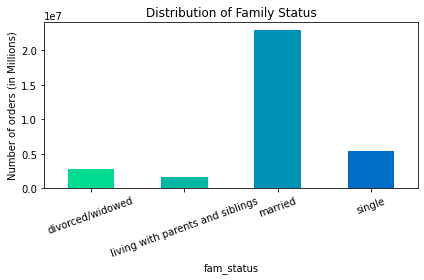

In [97]:
bar_family_status = df_ords_prods_custs_merge['fam_status'].value_counts().sort_index().plot.bar(color = sns.color_palette('winter_r'), xlabel= 'fam_status',  ylabel= 'Number of orders (in Millions)', title = 'Distribution of Family Status')
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [98]:
bar_family_status.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'family_status.png'))

In [99]:
# Import the department data
df_dept_goods = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [100]:
df_dept_goods.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [101]:
# transposing the column
df_dept_goods.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [102]:
# creating a new colunm called department name by pairing the department id
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 1, 'department_name'] = 'frozen'

In [103]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 2, 'department_name'] = 'other'

In [104]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 3, 'department_name'] = 'bakery'

In [105]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 4, 'department_name'] = 'produce'

In [106]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 5, 'department_name'] = 'alcohol'

In [107]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 6, 'department_name'] = 'international'

In [108]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 7, 'department_name'] = 'beverages'

In [109]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 8, 'department_name'] = 'pets'

In [110]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 9, 'department_name'] = 'dry goods pasta'

In [111]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 10, 'department_name'] = 'bulk'

In [112]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 11, 'department_name'] = 'personal care'

In [113]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 12, 'department_name'] = 'meat seafood'

In [114]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 13, 'department_name'] = 'pantry'

In [115]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 14, 'department_name'] = 'breakfast'

In [116]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 15, 'department_name'] = 'canned goods'

In [117]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 16, 'department_name'] = 'dairy eggs'

In [118]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 17, 'department_name'] = 'households'

In [119]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 18, 'department_name'] = 'babies'

In [120]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 19, 'department_name'] = 'snacks'

In [121]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 20, 'department_name'] = 'deli'

In [122]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 21, 'department_name'] = 'missing'

In [123]:
df_ords_prods_custs_merge['department_name'].value_counts()

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
households          738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department_name, dtype: int64

In [124]:
df_ords_prods_custs_merge['department_id'].value_counts(dropna=False).sort_index()

1.0     2234743
2.0       36291
3.0     1172428
4.0     9479291
5.0      153696
6.0      269253
7.0     2688123
8.0       97716
9.0      866627
10.0      34573
11.0     447572
12.0     708927
13.0    1875369
14.0     703033
15.0    1068058
16.0    5398747
17.0     738666
18.0     423802
19.0    2887550
20.0    1051249
21.0      69145
NaN      236409
Name: department_id, dtype: int64

In [125]:
df_ords_prods_custs_merge[['department_id', 'department_name']].head()

,department_id,department_name
0,7.0,beverages
1,7.0,beverages
2,7.0,beverages
3,7.0,beverages
4,7.0,beverages


In [126]:
df_ords_prods_custs_merge['n_dependants'].value_counts().sort_index()

0    8156947
1    8139996
2    8150216
3    8194109
Name: n_dependants, dtype: int64

In [127]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['n_dependants'] >= 1, 'parental_status'] = 'parent'

In [128]:
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['n_dependants'] <= 0, 'parental_status'] = 'not parent'

In [129]:
df_ords_prods_custs_merge['parental_status'].value_counts().sort_index()

not parent     8156947
parent        24484321
Name: parental_status, dtype: int64

In [130]:
df_ords_prods_custs_merge[['n_dependants', 'parental_status']].head()

,n_dependants,parental_status
0,3,parent
1,3,parent
2,3,parent
3,3,parent
4,3,parent


In [131]:
df_ords_prods_custs_merge[['n_dependants', 'parental_status']].tail()

,n_dependants,parental_status
32641263,2,parent
32641264,2,parent
32641265,2,parent
32641266,2,parent
32641267,2,parent


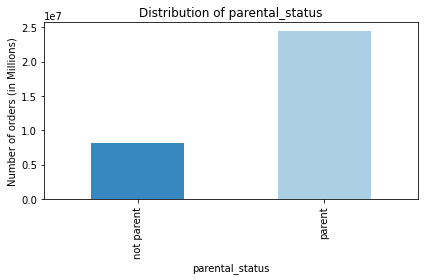

In [132]:
parentalsatus_bar = df_ords_prods_custs_merge['parental_status'].value_counts().sort_index().plot.bar(color = sns.color_palette('Blues_r', 2), xlabel= 'parental_status', ylabel= 'Number of orders (in Millions)', title = 'Distribution of parental_status')
plt.tight_layout()

In [133]:
parentalsatus_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'parentalsta.png'))

In [134]:
df_ords_prods_custs_merge.dtypes

order_id                   float64
user_id                    float64
order_number               float64
orders_day_of_week         float16
order_hour_of_day          float16
days_since_prior_order     float64
product_id                 float64
add_to_cart_order          float64
product_name              category
aisle_id                   float64
department_id              float16
prices                     float16
price_range_loc           category
busiest_day               category
Busiest_days              category
busiest_period_of_day     category
max_order                  float64
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float16
frequency_flag            category
surname                     object
gender                    category
state                       object
age                          int64
date_joined                 object
n_dependants                 int16
fam_status          

In [135]:
df_ords_prods_custs_merge[['Age_classification', 'income_range', 'parental_status']] = df_ords_prods_custs_merge[['Age_classification', 'income_range', 'parental_status']].astype('category')

In [136]:
df_ords_prods_custs_merge[['Age_classification', 'income_range', 'parental_status']].dtypes

Age_classification    category
income_range          category
parental_status       category
dtype: object

In [137]:
df_ords_prods_custs_merge['order_hour_of_day'].min()

0.0

In [138]:
df_ords_prods_custs_merge['order_hour_of_day'].max()

23.0

In [139]:
df_ords_prods_custs_merge['order_hour_of_day'].value_counts().sort_index()

0.0      220337
1.0      116589
2.0       69904
3.0       51675
4.0       53636
5.0       88661
6.0      292533
7.0      897163
8.0     1729871
9.0     2471067
10.0    2781009
11.0    2755369
12.0    2637533
13.0    2680171
14.0    2709084
15.0    2682090
16.0    2554110
17.0    2104225
18.0    1649870
19.0    1268365
20.0     983232
21.0     801052
22.0     638671
23.0     405051
Name: order_hour_of_day, dtype: int64

In [140]:
# Deriving new column During day
result_2 = []

for value in df_ords_prods_custs_merge['order_hour_of_day']:
    if value <= 11: 
        result_2.append('Morning')
    elif (value > 11) and (value <= 17):
        result_2.append('Afternoon')
    elif (value > 17) and (value <= 24):
        result_2.append('Evening')
    else: 
        result_2.append('later')

In [141]:
result_2

['Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Morning',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Morning',
 'Afternoon',
 'Afternoon'

In [142]:
# Create new part of the day column and set it equal to result
df_ords_prods_custs_merge['during_day'] = result_2

In [143]:
# Check the confirm part of the day results
df_ords_prods_custs_merge['during_day'].value_counts()

Afternoon    15367213
Morning      11527814
Evening       5746241
Name: during_day, dtype: int64

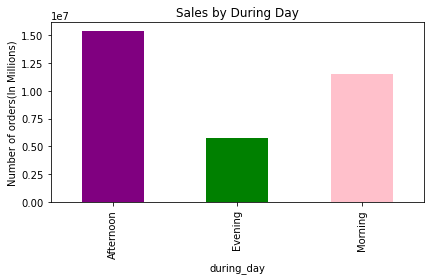

In [144]:
Duringday_bar = df_ords_prods_custs_merge['during_day'].value_counts().sort_index().plot.bar(color = ['purple', 'green', 'pink'], xlabel= 'during_day', ylabel= 'Number of orders(In Millions)', title = 'Sales by During Day')
plt.tight_layout()

In [145]:
Duringday_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'duringday.png'))

Text(0, 0.5, '')

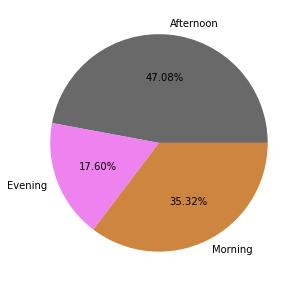

In [146]:
Duringday_pie = df_ords_prods_custs_merge['during_day'].value_counts().sort_index().plot.pie(autopct='%.2f%%', figsize=(5,5), colors = ['dimgrey','violet', 'peru'])
plt.ylabel('')

In [147]:
Duringday_pie.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'duringdaypie.png'))

In [148]:
income_order_hour4 = pd.crosstab(df_ords_prods_custs_merge['order_hour_of_day'], df_ords_prods_custs_merge['income_range'], dropna = False)

In [149]:
income_order_hour4

income_range,025000-040000,040000-080000,080000-120000,120000-160000,160000-210000,210000-523000,523000+
order_hour_of_day,,,,,,,
0.0,11647,67424,77068,50766,12192,1160,80
1.0,5553,36416,41490,25811,6444,757,118
2.0,3881,21973,23396,15876,3847,899,32
3.0,3075,15326,18127,11566,3074,496,11
4.0,2988,15918,18635,11953,3450,671,21
5.0,3961,26448,32287,19935,4909,1101,20
6.0,14231,89256,103594,65093,17384,2878,97
7.0,42302,270555,317047,203426,56301,7092,440
8.0,91834,524060,605460,387388,107975,12421,733


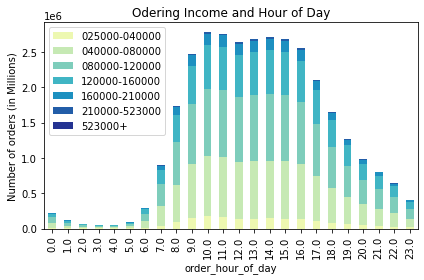

In [150]:
income_order_hour4 = income_order_hour4.plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu', 7), ylabel= 'Number of orders (in Millions)', title = 'Odering Income and Hour of Day')
plt.legend(loc='upper left')
plt.tight_layout()

In [151]:
income_order_hour4.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'income_hour_real.png'))

In [152]:
age_order_hour = pd.crosstab(df_ords_prods_custs_merge['order_hour_of_day'], df_ords_prods_custs_merge['Age_classification'], dropna = False)

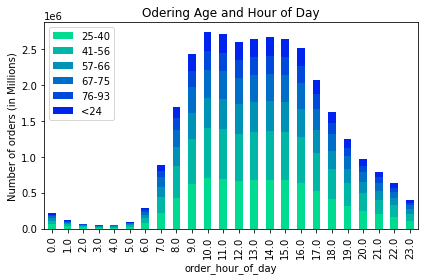

In [153]:
age_ordering_hour = age_order_hour.plot(kind = 'bar', stacked = True, color = sns.color_palette('winter_r'), ylabel= 'Number of orders (in Millions)', title = 'Odering Age and Hour of Day')
plt.legend(loc='upper left')
plt.tight_layout()

In [154]:
age_ordering_hour.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'age_hour.png'))

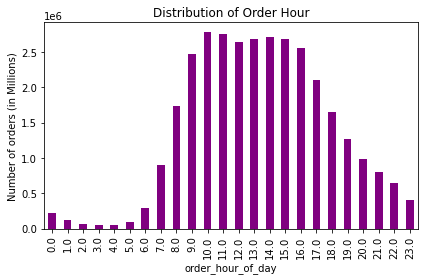

In [155]:
orderhour_bar = df_ords_prods_custs_merge['order_hour_of_day'].value_counts().sort_index().plot.bar(color =['purple'], xlabel= 'order_hour_of_day', ylabel= 'Number of orders (in Millions)', title = 'Distribution of Order Hour')
plt.tight_layout()

In [156]:
orderhour_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'Oderhour.png'))

In [157]:
# profiling the variables
during_price = pd.crosstab(df_ords_prods_custs_merge['during_day'], df_ords_prods_custs_merge['price_range_loc'], dropna = False)

In [158]:
during_price

price_range_loc,High-range product,Low-range product,Mid-range product
during_day,,,
Afternoon,201114,4755947,10296561
Evening,72816,1772980,3857345
Morning,143748,3597394,7706954


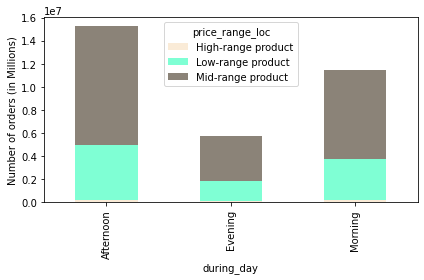

In [159]:
during_pricerang_bar = during_price.plot.bar(stacked=True, color = ['#FAEBD7','#7FFFD4', '#8B8378'], ylabel = 'Number of orders (in Millions)')
plt.tight_layout()

In [160]:
during_pricerang_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'during_pricerang.png'))

In [161]:
df_ords_prods_custs_merge['orders_day_of_week'].value_counts()

0.0    6252941
1.0    5696724
6.0    4530304
2.0    4243173
5.0    4236989
3.0    3868747
4.0    3812390
Name: orders_day_of_week, dtype: int64

In [162]:
# Creating day_of_week column with loc function 
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['orders_day_of_week'] == 0, 'day_of_week'] = 'Saturday'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['orders_day_of_week'] == 1, 'day_of_week'] = 'Sunday'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['orders_day_of_week'] == 2, 'day_of_week'] = 'Monday'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['orders_day_of_week'] == 3, 'day_of_week'] = 'Tuesday'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['orders_day_of_week'] == 4, 'day_of_week'] = 'Wednesday'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['orders_day_of_week'] == 5, 'day_of_week'] = 'Thursday'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['orders_day_of_week'] == 6, 'day_of_week'] = 'Friday'

In [163]:
df_ords_prods_custs_merge['day_of_week'].value_counts().sort_index()

Friday       4530304
Monday       4243173
Saturday     6252941
Sunday       5696724
Thursday     4236989
Tuesday      3868747
Wednesday    3812390
Name: day_of_week, dtype: int64

In [164]:
Dayweek_pricerange = pd.crosstab(df_ords_prods_custs_merge['orders_day_of_week'], df_ords_prods_custs_merge['price_range_loc'], dropna = False)

In [165]:
Dayweek_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
orders_day_of_week,,,
0.0,87703,1897856,4218623
1.0,70046,1781899,3808285
2.0,51340,1329813,2832677
3.0,46489,1211356,2582689
4.0,45773,1195353,2542676
5.0,52327,1328581,2824883
6.0,64000,1381463,3051027


In [166]:
crosstab_dayprice = pd.crosstab(df_ords_prods_custs_merge['day_of_week'], df_ords_prods_custs_merge['price_range_loc'], dropna = False)

In [167]:
crosstab_dayprice

price_range_loc,High-range product,Low-range product,Mid-range product
day_of_week,,,
Friday,64000,1381463,3051027
Monday,51340,1329813,2832677
Saturday,87703,1897856,4218623
Sunday,70046,1781899,3808285
Thursday,52327,1328581,2824883
Tuesday,46489,1211356,2582689
Wednesday,45773,1195353,2542676


In [168]:
week_price = df_ords_prods_custs_merge.groupby('day_of_week').agg({'prices': ['mean']})

In [169]:
week_price

,prices
,mean
day_of_week,
Friday,7.855469
Monday,7.753906
Saturday,7.859375
Sunday,7.757812
Thursday,7.761719
Tuesday,7.757812
Wednesday,7.757812


In [170]:
crosstab_hourweek = pd.crosstab(df_ords_prods_custs_merge['order_hour_of_day'], df_ords_prods_custs_merge['day_of_week'], dropna = False)

In [171]:
crosstab_hourweek

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
order_hour_of_day,,,,,,,
0.0,31519,30067,39121,37314,29721,27710,24885
1.0,18339,14798,22687,18391,15095,13651,13628
2.0,11468,8390,12835,10859,9581,8730,8041
3.0,7960,7066,8926,7151,8370,5826,6376
4.0,7990,6846,8435,7721,8791,6893,6960
5.0,10856,12818,11724,14506,14839,11830,12088
6.0,32372,44051,35178,53047,46582,41200,40103
7.0,118231,123176,134276,166224,129718,111362,114176
8.0,240804,225199,308390,334892,225548,199671,195367


In [172]:
hour_price = df_ords_prods_custs_merge.groupby('order_hour_of_day').agg({'prices': ['mean']})

In [173]:
hour_price

,prices
,mean
order_hour_of_day,
0.0,7.812500
1.0,7.804688
2.0,7.800781
3.0,7.828125
4.0,7.839844
5.0,7.828125
6.0,7.816406
7.0,7.820312


Text(0, 0.5, 'average_price')

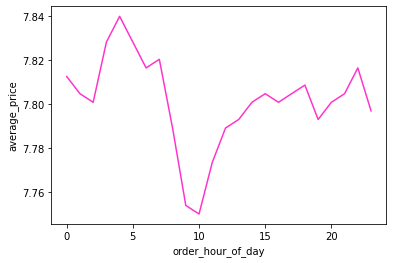

In [174]:
pricehour_line = hour_price.plot.line(legend = False,color = sns.color_palette('spring', 4))
plt.ylabel('average_price')

In [175]:
pricehour_line.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'price_hour.png'))

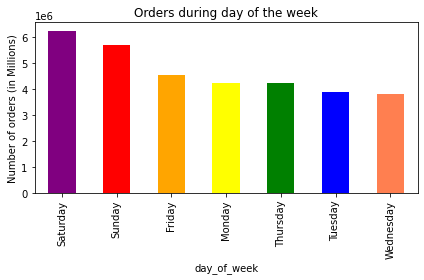

In [176]:
daysweek_bar = df_ords_prods_custs_merge['day_of_week'].value_counts().plot.bar(color =['purple','red', 'orange', 'yellow', 'green', 'blue', 'coral'], xlabel= 'day_of_week', ylabel= 'Number of orders (in Millions)', title = 'Orders during day of the week')
plt.tight_layout()

In [177]:
daysweek_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'days_week.png'))

In [178]:
deptid_names = pd.crosstab(df_ords_prods_custs_merge['department_name'], df_ords_prods_custs_merge['department_id'], dropna = False)

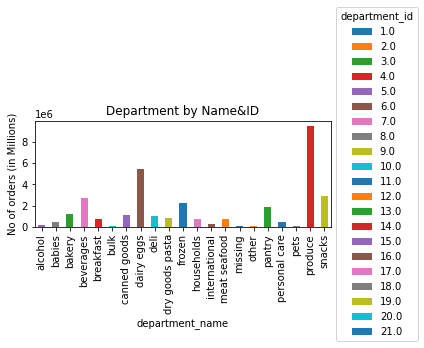

In [179]:
deptid_name_bar = deptid_names.plot(kind = 'bar', stacked = True, ylabel= 'No of orders (in Millions)', title = 'Department by Name&ID')
plt.legend(title = 'department_id',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [180]:
deptid_name_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'deptid_namebar.png'))

In [181]:
dept_age = pd.crosstab(df_ords_prods_custs_merge['department_name'], df_ords_prods_custs_merge['Age_classification'], dropna = False)

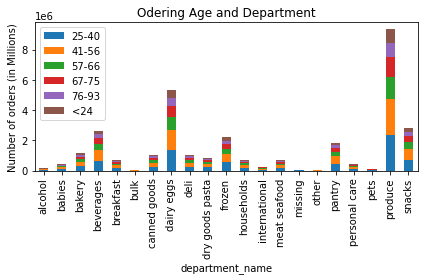

In [182]:
dept_agebar = dept_age.plot(kind = 'bar', stacked = True, ylabel= 'Number of orders (in Millions)', title = 'Odering Age and Department')
plt.legend(loc='upper left')
plt.tight_layout()

In [183]:
dept_agebar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'age_dept_namebar.png'))

In [184]:
dept_income = pd.crosstab(df_ords_prods_custs_merge['department_name'], df_ords_prods_custs_merge['income_range'], dropna = False)

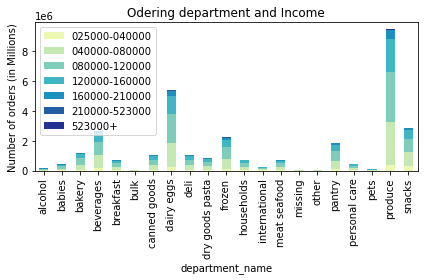

In [185]:
dept_incomebar = dept_income.plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu', 7), ylabel= 'Number of orders (in Millions)', title = 'Odering department and Income')
plt.legend(loc='upper left')
plt.tight_layout()

In [186]:
dept_incomebar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'dept_incomebar.png'))

Text(0, 0.5, '')

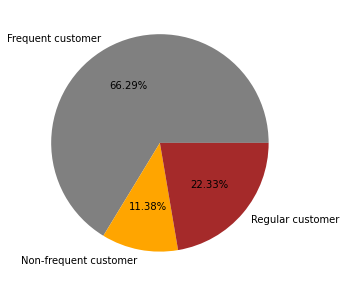

In [187]:
pie_frequent = df_ords_prods_custs_merge['frequency_flag'].value_counts().sort_index().plot.pie(autopct='%.2f%%', figsize=(5,5), colors = ['grey','orange', 'brown'])
plt.ylabel('')

Text(0, 0.5, '')

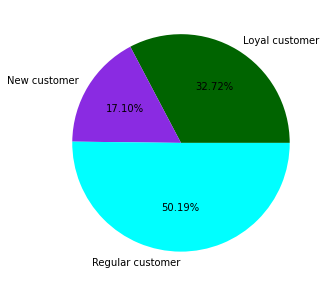

In [188]:
pie_frequent = df_ords_prods_custs_merge['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%.2f%%', figsize=(5,5), colors = ['darkgreen','blueviolet', 'cyan'])
plt.ylabel('')

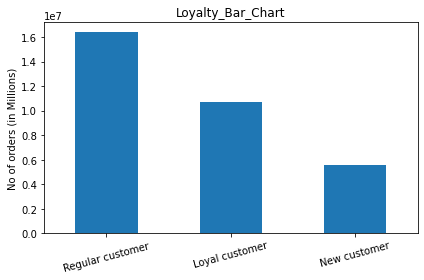

In [189]:
loyalty_flag_bar = df_ords_prods_custs_merge['loyalty_flag'].value_counts().plot.bar(ylabel= 'No of orders (in Millions)', title = 'Loyalty_Bar_Chart')
plt.xticks(rotation= 15, horizontalalignment="center")
plt.tight_layout()

In [190]:
loyalty_flag_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'barloyal_customer.png'))

In [191]:
pie_frequent.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'pie_loyalcustomer.png'))

Text(0, 0.5, '')

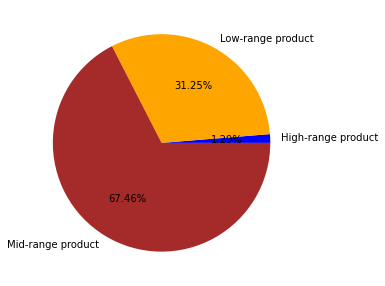

In [192]:
pie_price_range = df_ords_prods_custs_merge['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%.2f%%', figsize=(5,5), colors = ['blue','orange', 'brown'])
plt.ylabel('')

In [193]:
pie_price_range.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'pricerange.png'))

In [194]:
df_ords_prods_custs_merge['price_range_loc'].value_counts().sort_index()

High-range product      417678
Low-range product     10126321
Mid-range product     21860860
Name: price_range_loc, dtype: int64

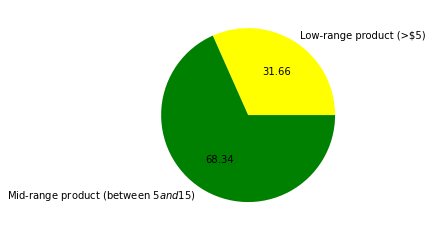

In [195]:
# Pie chart showing the distribution of products sold by price range
pie_price_range2pie = y = np.array([10126321, 21860860])
mylabels = ["Low-range product (>$5)", "Mid-range product (between $5 and $15)"]
colors = ['yellow', 'green']

plt.pie(y, labels = mylabels, colors=colors, autopct='%.2f')

figsize=(8,5)

plt.show()

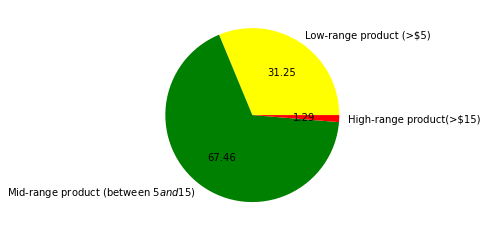

In [196]:
price_range2pie = y = np.array([10126321, 21860860, 417678])
mylabels = ["Low-range product (>$5)", "Mid-range product (between $5 and $15)", "High-range product(>$15)"]
colors = ['yellow', 'green', 'red']

plt.pie(y, labels = mylabels, colors=colors, autopct='%.2f')

figsize=(10,5)

plt.show()

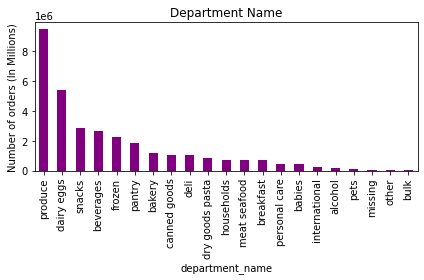

In [197]:
dept_name_bar = df_ords_prods_custs_merge['department_name'].value_counts().plot.bar(color =['purple'], xlabel= 'department_name', ylabel= 'Number of orders (In Millions)', title = 'Department Name')
plt.tight_layout()

In [198]:
dept_name_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'Dept_name.png'))

In [199]:
parent_price = pd.crosstab(df_ords_prods_custs_merge['parental_status'], df_ords_prods_custs_merge['price_range_loc'], dropna = False)

In [200]:
parent_price

price_range_loc,High-range product,Low-range product,Mid-range product
parental_status,,,
not parent,102177,2531324,5464002
parent,315501,7594997,16396858


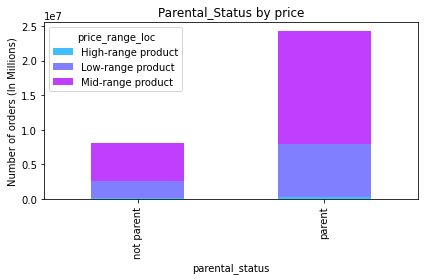

In [201]:
parent_prices = parent_price.plot.bar(stacked = True, color = sns.color_palette('cool',3), ylabel= 'Number of orders (In Millions)', title = 'Parental_Status by price')
plt.legend(title = 'price_range_loc',loc='upper left')
plt.tight_layout()

In [202]:
parent_prices.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'Parent_price_range.png'))

Text(0, 0.5, '')

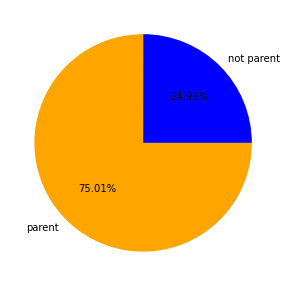

In [203]:
pie_parentalstatus = df_ords_prods_custs_merge['parental_status'].value_counts().sort_index().plot.pie(autopct='%.2f%%', figsize=(5,5), colors = ['blue','orange', 'brown'])
plt.ylabel('')

In [204]:
pie_parentalstatus.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'pie_parental_status.png'))

In [205]:
df_ords_prods_custs_merge.dtypes

order_id                   float64
user_id                    float64
order_number               float64
orders_day_of_week         float16
order_hour_of_day          float16
days_since_prior_order     float64
product_id                 float64
add_to_cart_order          float64
product_name              category
aisle_id                   float64
department_id              float16
prices                     float16
price_range_loc           category
busiest_day               category
Busiest_days              category
busiest_period_of_day     category
max_order                  float64
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float16
frequency_flag            category
surname                     object
gender                    category
state                       object
age                          int64
date_joined                 object
n_dependants                 int16
fam_status          

In [206]:
df_ords_prods_custs_merge['region'].value_counts(dropna = False)

South        10229198
West          8994703
Midwest       7652535
Northeast     5764832
Name: region, dtype: int64

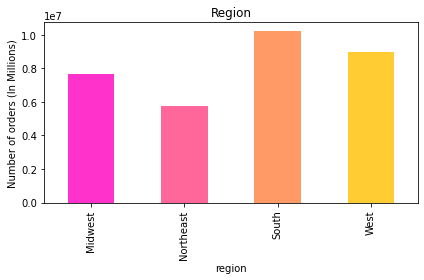

In [207]:
region_bar = df_ords_prods_custs_merge['region'].value_counts().sort_index().plot.bar(color = sns.color_palette('spring', 4), xlabel= 'region', ylabel= 'Number of orders (In Millions)', title = 'Region')
plt.tight_layout()

In [208]:
region_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'regionbar.png'))

In [209]:
parent_frequent = pd.crosstab(df_ords_prods_custs_merge['parental_status'], df_ords_prods_custs_merge['frequency_flag'], dropna = False)

In [210]:
parent_frequent

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
parental_status,,,
not parent,5393722,917899,1845326
parent,16245466,2796712,5442143


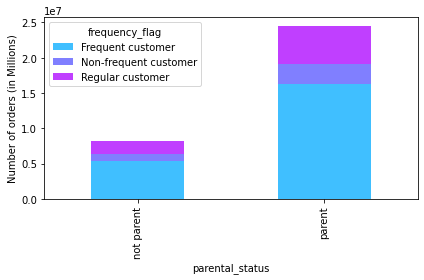

In [211]:
parent_frequent = parent_frequent.plot.bar(stacked = True, color = sns.color_palette('cool',3), ylabel= 'Number of orders (in Millions)')
plt.legend(title = 'frequency_flag',loc='upper left')
plt.tight_layout()

In [212]:
parent_frequent.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'parentfrebar.png'))

In [213]:
week_busiest = pd.crosstab(df_ords_prods_custs_merge['day_of_week'], df_ords_prods_custs_merge['busiest_period_of_day'], dropna = False)

In [214]:
week_busiest

busiest_period_of_day,Average orders,Fewest orders,Most orders
day_of_week,,,
Friday,382466,3782445,365393
Monday,336542,3544668,361963
Saturday,562284,5171038,519619
Sunday,459966,4683834,552924
Thursday,338655,3540675,357659
Tuesday,304710,3248538,315499
Wednesday,295548,3208890,307952


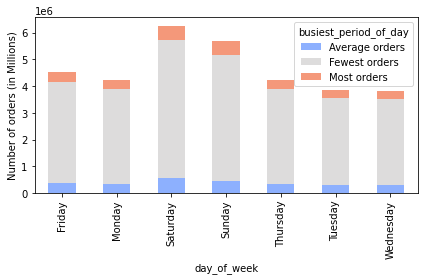

In [215]:
week_busiestbar = week_busiest.plot.bar(stacked = True, color = sns.color_palette('coolwarm',3), ylabel= 'Number of orders (in Millions)')
plt.legend(title = 'busiest_period_of_day',loc='upper right')
plt.tight_layout()

In [216]:
week_busiestbar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'week_busiestbar.png'))

In [217]:
age_parent = pd.crosstab(df_ords_prods_custs_merge['Age_classification'], df_ords_prods_custs_merge['parental_status'], dropna = False)

In [218]:
age_parent

parental_status,not parent,parent
Age_classification,,
25-40,2057903,6097955
41-56,2033425,6191515
57-66,1296377,3698068
67-75,1134313,3460432
76-93,764977,2307334
<24,751695,2334644


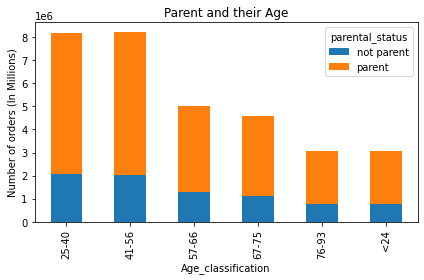

In [219]:
age_parent = age_parent.plot.bar(stacked=True, ylabel= 'Number of orders (In Millions)', title = 'Parent and their Age')
plt.tight_layout()

In [220]:
age_parent.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'parentage.png'))

In [221]:
age_frequent = pd.crosstab(df_ords_prods_custs_merge['Age_classification'], df_ords_prods_custs_merge['frequency_flag'], dropna = False)

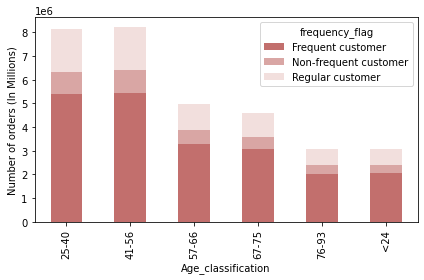

In [222]:
age_frequent = age_frequent.plot.bar(stacked=True, ylabel= 'Number of orders (In Millions)', color = sns.color_palette('vlag_r'))
plt.tight_layout()

In [223]:
age_frequent.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'age_frequntcy.png'))

In [224]:
parent_frequent_barh = pd.crosstab(df_ords_prods_custs_merge['parental_status'], df_ords_prods_custs_merge['frequency_flag'], dropna = False)

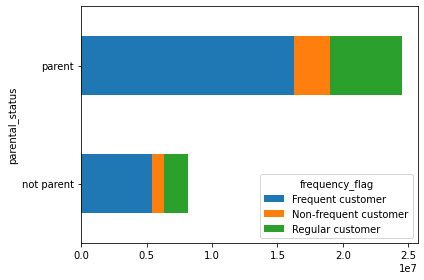

In [225]:
parent_frequent_ba = parent_frequent_barh.plot.barh(stacked = True, ylabel= 'Number of orders (in Millions)')
plt.tight_layout()

In [226]:
age_spending = pd.crosstab(df_ords_prods_custs_merge['Age_classification'], df_ords_prods_custs_merge['spending_flag'], dropna = False)

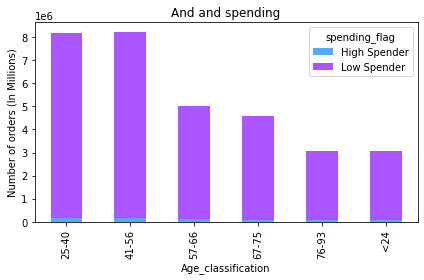

In [227]:
age_spending = age_spending.plot.bar(stacked=True, color = sns.color_palette('cool', 2), ylabel= 'Number of orders (In Millions)', title = 'And and spending')
plt.tight_layout()

In [228]:
crosstab_13 = pd.crosstab(df_ords_prods_custs_merge['region'], df_ords_prods_custs_merge['loyalty_flag'], dropna = False)

In [229]:
crosstab_13

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2461962,1310882,3879691
Northeast,1905685,984538,2874609
South,3335405,1746980,5146813
West,2976526,1537818,4480359


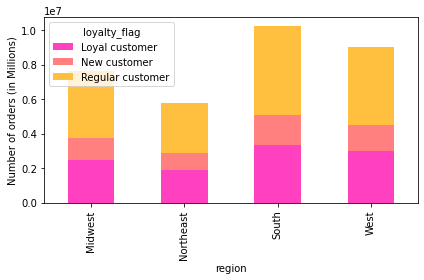

In [230]:
regionloyalty = crosstab_13.plot.bar(stacked=True, color = sns.color_palette('spring', 3), ylabel= 'Number of orders (in Millions)')
plt.tight_layout()

In [231]:
crosstab_14 = pd.crosstab(df_ords_prods_custs_merge['region'], df_ords_prods_custs_merge['frequency_flag'], dropna = False)

In [232]:
crosstab_14

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,5038934,880834,1732767
Northeast,3816729,644820,1303283
South,6792200,1170847,2266151
West,5991325,1018110,1985268


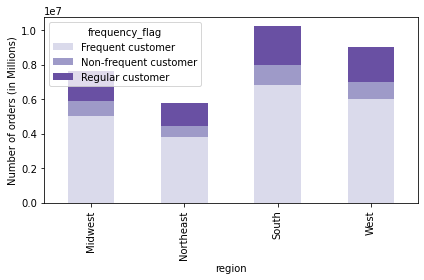

In [233]:
region_freq = crosstab_14.plot.bar(stacked=True, color = sns.color_palette('Purples', 3), ylabel= 'Number of orders (in Millions)')
plt.tight_layout()

In [234]:
crosstab_15 = pd.crosstab(df_ords_prods_custs_merge['region'], df_ords_prods_custs_merge['income_range'], dropna = False)

In [235]:
crosstab_15

income_range,025000-040000,040000-080000,080000-120000,120000-160000,160000-210000,210000-523000,523000+
region,,,,,,,
Midwest,405394,2300797,2651756,1774331,456627,57416,6214
Northeast,306777,1717126,2027292,1318158,355888,37141,2450
South,565144,3121253,3556622,2283237,628563,72510,1869
West,468894,2783455,3100923,2037257,537544,62505,4125


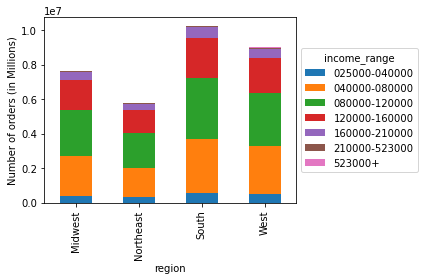

In [236]:
region_income = crosstab_15.plot.bar(stacked=True, ylabel= 'Number of orders (in Millions)')
plt.legend(title = 'income_range',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [237]:
region_income.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'income_region.png'))

In [238]:
crosstab_16 = pd.crosstab(df_ords_prods_custs_merge['region'], df_ords_prods_custs_merge['price_range_loc'], dropna = False)

In [239]:
crosstab_16

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,97918,2372304,5127103
Northeast,73202,1792943,3856591
South,131287,3168272,6855302
West,115271,2792802,6021864


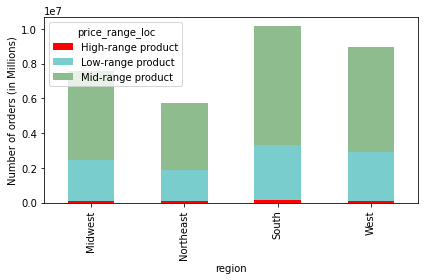

In [240]:
region_priceloc_bar = crosstab_16.plot.bar(stacked=True, color = ['red','#79CDCD', '#8FBC8F'], ylabel= 'Number of orders (in Millions)')
plt.tight_layout()

Text(0, 0.5, '')

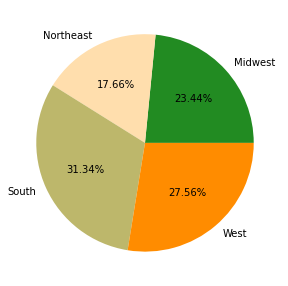

In [241]:
pie_region = df_ords_prods_custs_merge['region'].value_counts().sort_index().plot.pie(autopct='%.2f%%', figsize=(5,5), colors = ['forestgreen','navajowhite', 'darkkhaki', 'darkorange'])
plt.ylabel('')

In [242]:
pie_region.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'pie_region.png'))

In [243]:
crosstab_18 = pd.crosstab(df_ords_prods_custs_merge['Age_classification'], df_ords_prods_custs_merge['loyalty_flag'], dropna = False)

In [244]:
crosstab_18

loyalty_flag,Loyal customer,New customer,Regular customer
Age_classification,,,
25-40,2634099,1383213,4138546
41-56,2694928,1407035,4122977
57-66,1644605,866762,2483078
67-75,1527481,783580,2283684
76-93,996794,523998,1551519
<24,1020170,525953,1540216


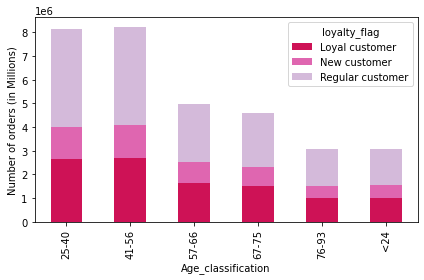

In [245]:
age_loyalty_barh = crosstab_18.plot.bar(stacked = True, color = sns.color_palette('PuRd_r', 3), ylabel= 'Number of orders (in Millions)')
plt.legend(title = 'loyalty_flag',loc='upper right')
plt.tight_layout()

In [246]:
crosstab_19 = pd.crosstab(df_ords_prods_custs_merge['region'], df_ords_prods_custs_merge['spending_flag'], dropna = False)

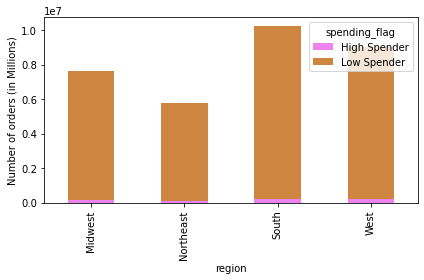

In [247]:
region_sending_bar = crosstab_19.plot.bar(stacked=True, color = ['violet', 'peru'], ylabel= 'Number of orders (in Millions)')
plt.tight_layout()

In [248]:
df_ords_prods_custs_merge[['department_id', 'department_name']].value_counts()

department_id  department_name
4.0            produce            9479291
16.0           dairy eggs         5398747
19.0           snacks             2887550
7.0            beverages          2688123
1.0            frozen             2234743
13.0           pantry             1875369
3.0            bakery             1172428
15.0           canned goods       1068058
20.0           deli               1051249
9.0            dry goods pasta     866627
17.0           households          738666
12.0           meat seafood        708927
14.0           breakfast           703033
11.0           personal care       447572
18.0           babies              423802
6.0            international       269253
5.0            alcohol             153696
8.0            pets                 97716
21.0           missing              69145
2.0            other                36291
10.0           bulk                 34573
dtype: int64

In [249]:
# Deriving new column
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 4, 'Top_5_department'] = 'produce'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 16, 'Top_5_department'] = 'dairy eggs'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 19, 'Top_5_department'] = 'snacks'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 7, 'Top_5_department'] = 'beverages'
df_ords_prods_custs_merge.loc[df_ords_prods_custs_merge['department_id'] == 1, 'Top_5_department'] = 'frozen'

In [250]:
df_ords_prods_custs_merge['Top_5_department'].value_counts()

produce       9479291
dairy eggs    5398747
snacks        2887550
beverages     2688123
frozen        2234743
Name: Top_5_department, dtype: int64

In [251]:
len(df_ords_prods_custs_merge['Top_5_department'])

32641268

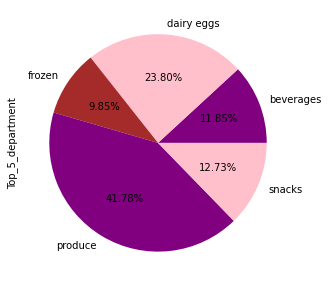

In [252]:
pie_top_5dept = df_ords_prods_custs_merge['Top_5_department'].value_counts().sort_index().plot.pie(autopct='%.2f%%', figsize=(5,5), colors = ['purple','pink', 'brown'])

In [253]:
df_ords_prods_custs_merge.dtypes

order_id                   float64
user_id                    float64
order_number               float64
orders_day_of_week         float16
order_hour_of_day          float16
days_since_prior_order     float64
product_id                 float64
add_to_cart_order          float64
product_name              category
aisle_id                   float64
department_id              float16
prices                     float16
price_range_loc           category
busiest_day               category
Busiest_days              category
busiest_period_of_day     category
max_order                  float64
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float16
frequency_flag            category
surname                     object
gender                    category
state                       object
age                          int64
date_joined                 object
n_dependants                 int16
fam_status          

In [254]:
df_ords_prods_custs_merge['during_day'] = df_ords_prods_custs_merge['during_day'].astype('category')

In [255]:
df_ords_prods_custs_merge['day_of_week'] = df_ords_prods_custs_merge['day_of_week'].astype('category')

In [256]:
df_ords_prods_custs_merge['Top_5_department'] = df_ords_prods_custs_merge['Top_5_department'].astype('category')

In [257]:
df_ords_prods_custs_merge[['during_day', 'day_of_week', 'Top_5_department']].dtypes

during_day          category
day_of_week         category
Top_5_department    category
dtype: object

In [258]:
df_ords_prods_custs_merge['Age_classification'].value_counts().sort_index()

25-40    8155858
41-56    8224940
57-66    4994445
67-75    4594745
76-93    3072311
<24      3086339
Name: Age_classification, dtype: int64

In [259]:
df_ords_prods_custs_merge['income_range'].value_counts().sort_index()

025000-040000     1746209
040000-080000     9922631
080000-120000    11336593
120000-160000     7412983
160000-210000     1978622
210000-523000      229572
523000+             14658
Name: income_range, dtype: int64

# creating a new colunm called Customer Profile with top departments, age and inome.
Profiling Young Parents earning from 30 years old below with an income less than 400000 
Profiling Single Adults earning from 30 years old below with an income less than 400000 

In [260]:
# creating flag for Young parent (age: <30, income: 400000, department_id: 1, 4, 7, 8, 16, parental_status: Parent)
df_ords_prods_custs_merge.loc[(df_ords_prods_custs_merge['age'] <= 30) & (df_ords_prods_custs_merge['income'] <= 400000) & (df_ords_prods_custs_merge['department_id'].isin([1, 4, 7, 8, 16,])) & (df_ords_prods_custs_merge['parental_status'] == 'parent'), 'customer_profile'] = 'Young parent'

In [261]:
# creating flag for Single adult (age: <30, income: 400000, department_id: 1, 4, 7, 8, 16, parental_status: Not Parent)
df_ords_prods_custs_merge.loc[(df_ords_prods_custs_merge['age'] <= 30) & (df_ords_prods_custs_merge['income'] <= 400000) & (df_ords_prods_custs_merge['department_id'].isin([1, 4, 7, 8, 16,])) & (df_ords_prods_custs_merge['parental_status'] == 'not parent'), 'customer_profile'] = 'Single adult'

In [262]:
df_ords_prods_custs_merge['customer_profile'].value_counts()

Young parent    3036242
Single adult    1008007
Name: customer_profile, dtype: int64

In [263]:
df_ords_prods_custs_merge.dtypes

order_id                   float64
user_id                    float64
order_number               float64
orders_day_of_week         float16
order_hour_of_day          float16
days_since_prior_order     float64
product_id                 float64
add_to_cart_order          float64
product_name              category
aisle_id                   float64
department_id              float16
prices                     float16
price_range_loc           category
busiest_day               category
Busiest_days              category
busiest_period_of_day     category
max_order                  float64
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float16
frequency_flag            category
surname                     object
gender                    category
state                       object
age                          int64
date_joined                 object
n_dependants                 int16
fam_status          

In [357]:
df_ords_prods_custs_merge[['customer_profile']].dtypes

customer_profile    category
dtype: object

In [264]:
df_ords_prods_custs_merge['customer_profile'].value_counts(dropna=False)

NaN             28597019
Young parent     3036242
Single adult     1008007
Name: customer_profile, dtype: int64

In [265]:
pd.options.display.max_rows = None

In [266]:
df_ords_prods_custs_merge.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,region,exclusion_flag,Age_classification,income_range,department_name,parental_status,during_day,day_of_week,Top_5_department,customer_profile
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Monday,beverages,NaN
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Tuesday,beverages,NaN
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Afternoon,Tuesday,beverages,NaN
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Wednesday,beverages,NaN
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Afternoon,Wednesday,beverages,NaN
5,3367565.0,1.0,6.0,2.0,7.0,19.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Monday,beverages,NaN
6,550135.0,1.0,7.0,1.0,9.0,20.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Sunday,beverages,NaN
7,3108588.0,1.0,8.0,1.0,14.0,14.0,196.0,2.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Afternoon,Sunday,beverages,NaN
8,2295261.0,1.0,9.0,1.0,16.0,0.0,196.0,4.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Afternoon,Sunday,beverages,NaN
9,2550362.0,1.0,10.0,4.0,8.0,30.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Wednesday,beverages,NaN


In [268]:
df_ords_prods_custs_merge[['user_id', 'customer_profile']].head(25)

,user_id,customer_profile
0,1.0,NaN
1,1.0,NaN
2,1.0,NaN
3,1.0,NaN
4,1.0,NaN
5,1.0,NaN
6,1.0,NaN
7,1.0,NaN
8,1.0,NaN
9,1.0,NaN


In [269]:
len(df_ords_prods_custs_merge['customer_profile'])

32641268

In [270]:
# transform all values in customer_profile column to be the same value for each user_id
df_ords_prods_custs_merge['customer_profile'] = df_ords_prods_custs_merge.groupby('user_id')['customer_profile'].transform('first')

In [272]:
df_ords_prods_custs_merge.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,region,exclusion_flag,Age_classification,income_range,department_name,parental_status,during_day,day_of_week,Top_5_department,customer_profile
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Monday,beverages,None
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Tuesday,beverages,None
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Afternoon,Tuesday,beverages,None
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Wednesday,beverages,None
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Afternoon,Wednesday,beverages,None
5,3367565.0,1.0,6.0,2.0,7.0,19.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Monday,beverages,None
6,550135.0,1.0,7.0,1.0,9.0,20.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Sunday,beverages,None
7,3108588.0,1.0,8.0,1.0,14.0,14.0,196.0,2.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Afternoon,Sunday,beverages,None
8,2295261.0,1.0,9.0,1.0,16.0,0.0,196.0,4.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Afternoon,Sunday,beverages,None
9,2550362.0,1.0,10.0,4.0,8.0,30.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Wednesday,beverages,None


In [273]:
df_ords_prods_custs_merge['customer_profile'].value_counts(dropna=False)

NaN             25996593
Young parent     4989204
Single adult     1655471
Name: customer_profile, dtype: int64

In [274]:
df_ords_prods_custs_merge['customer_profile'].fillna('Others', inplace=True)

In [275]:
df_ords_prods_custs_merge['customer_profile'].value_counts(dropna=False)

Others          25996593
Young parent     4989204
Single adult     1655471
Name: customer_profile, dtype: int64

In [276]:
len(df_ords_prods_custs_merge['customer_profile'])

32641268

In [277]:
df_ords_prods_custs_merge[['user_id', 'customer_profile']].head(100)

,user_id,customer_profile
0,1.0,Others
1,1.0,Others
2,1.0,Others
3,1.0,Others
4,1.0,Others
5,1.0,Others
6,1.0,Others
7,1.0,Others
8,1.0,Others
9,1.0,Others


In [280]:
df_ords_prods_custs_merge[['user_id', 'customer_profile']].tail(100)

,user_id,customer_profile
32641168,206202.0,Others
32641169,206202.0,Others
32641170,206202.0,Others
32641171,206202.0,Others
32641172,206202.0,Others
32641173,206202.0,Others
32641174,206202.0,Others
32641175,206202.0,Others
32641176,206202.0,Others
32641177,206202.0,Others


In [279]:
df_ords_prods_custs_merge['customer_profile'].value_counts(dropna=False)

Others          25996593
Young parent     4989204
Single adult     1655471
Name: customer_profile, dtype: int64

In [281]:
crosstab_customeregion = pd.crosstab(df_ords_prods_custs_merge['customer_profile'], df_ords_prods_custs_merge['region'], dropna = False)

In [282]:
crosstab_customeregion

region,Midwest,Northeast,South,West
customer_profile,,,,
Others,6111886,4595148,8119713,7169846
Single adult,373883,299536,534533,447519
Young parent,1166766,870148,1574952,1377338


In [283]:
crosstab_customeregion.to_clipboard()

In [284]:
df_ords_prods_custs_merge.shape

(32641268, 41)

In [285]:
len(df_ords_prods_custs_merge['customer_profile'])

32641268

In [286]:
df_ords_prods_custs_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,...,region,exclusion_flag,Age_classification,income_range,department_name,parental_status,during_day,day_of_week,Top_5_department,customer_profile
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Monday,beverages,Others
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Tuesday,beverages,Others
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Afternoon,Tuesday,beverages,Others
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Morning,Wednesday,beverages,Others
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,Soda,77.0,...,South,non low activity customer,25-40,040000-080000,beverages,parent,Afternoon,Wednesday,beverages,Others


In [287]:
crosstab_customeage = pd.crosstab(df_ords_prods_custs_merge['customer_profile'], df_ords_prods_custs_merge['Age_classification'], dropna = False)

In [288]:
crosstab_customeage

Age_classification,25-40,41-56,57-66,67-75,76-93,<24
customer_profile,,,,,,
Others,5108747,8224940,4994445,4594745,3072311,1170
Single adult,785964,0,0,0,0,751369
Young parent,2261147,0,0,0,0,2333800


In [289]:
crosstab_customeage.to_clipboard()

In [290]:
crosstab_customspend = pd.crosstab(df_ords_prods_custs_merge['customer_profile'], df_ords_prods_custs_merge['spending_flag'], dropna = False)

In [291]:
crosstab_customspend

spending_flag,High Spender,Low Spender
customer_profile,,
Others,517740,25478853
Single adult,26213,1629258
Young parent,96082,4893122


In [292]:
crosstab_customspend.to_clipboard()

In [293]:
crosstab_customloyality = pd.crosstab(df_ords_prods_custs_merge['customer_profile'], df_ords_prods_custs_merge['loyalty_flag'], dropna = False)

In [294]:
crosstab_customloyality

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
Others,8542146,4439465,13014982
Single adult,531257,288741,835473
Young parent,1606175,852012,2531017


In [295]:
crosstab_customloyality.to_clipboard()

In [296]:
df_ords_prods_custs_merge[['customer_profile', 'department_name']].head()

,customer_profile,department_name
0,Others,beverages
1,Others,beverages
2,Others,beverages
3,Others,beverages
4,Others,beverages


# 6, Create an appropriate visualization to show the distribution of profiles.

In [297]:
# 6, Create an appropriate visualization to show the distribution of profiles.
df_ords_prods_custs_merge.dtypes

order_id                   float64
user_id                    float64
order_number               float64
orders_day_of_week         float16
order_hour_of_day          float16
days_since_prior_order     float64
product_id                 float64
add_to_cart_order          float64
product_name              category
aisle_id                   float64
department_id              float16
prices                     float16
price_range_loc           category
busiest_day               category
Busiest_days              category
busiest_period_of_day     category
max_order                  float64
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float16
frequency_flag            category
surname                     object
gender                    category
state                       object
age                          int64
date_joined                 object
n_dependants                 int16
fam_status          

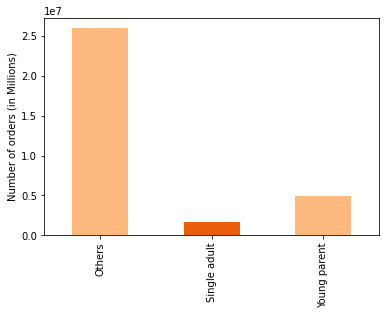

In [298]:
customersing_youngadult_income = df_ords_prods_custs_merge['customer_profile'].value_counts().sort_index().plot.bar(color = sns.color_palette('Oranges', 2), ylabel ='Number of orders (in Millions)')

In [299]:
customersing_youngadult_income.figure.savefig(os.path.join(path, '07 real Viz', 'new visual', 'customer_profile.png'))

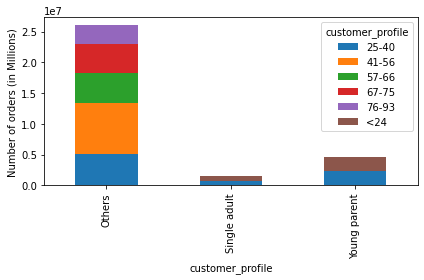

In [301]:
crosstab_customerage = crosstab_customeage.plot(kind = 'bar', stacked = True, ylabel= 'Number of orders (in Millions)')
plt.legend(title = 'customer_profile',loc='upper right')
plt.tight_layout()

In [302]:
crosstab_customerage.figure.savefig(os.path.join(path, '07 real Viz', 'new visual', 'customerprofile_below40k.png'))

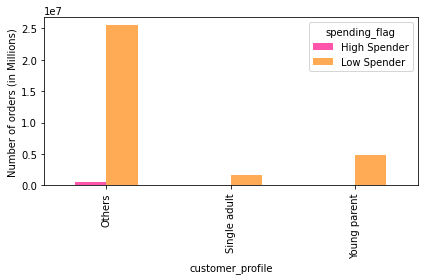

In [303]:
customer_spend_bar = crosstab_customspend.plot.bar(color = sns.color_palette('spring', 2), ylabel= 'Number of orders (in Millions)')
plt.tight_layout()

In [304]:
customer_spend_bar.figure.savefig(os.path.join(path, '07 real Viz', 'new visual', 'customerprof_spendings.png'))

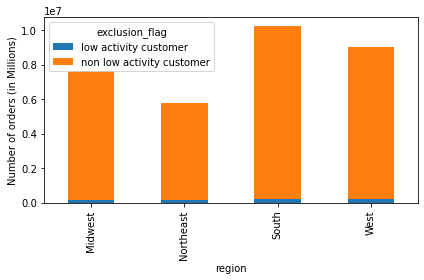

In [305]:
region_lowactivity_bar = crosstab_region_exflag = crosstab_region_exflag.plot.bar(stacked=True, ylabel= 'Number of orders (in Millions)')
plt.tight_layout()

In [306]:
age_busiest_bar= pd.crosstab(df_ords_prods_custs_merge['Age_classification'], df_ords_prods_custs_merge['Busiest_days'], dropna = False)

In [307]:
age_busiest_bar

Busiest_days,Busiest day,Regularly busy,Slowest days
Age_classification,,,
25-40,1574054,5618561,963243
41-56,1566495,5686688,971757
57-66,953941,3443694,596810
67-75,875233,3170195,549317
76-93,595012,2113956,363343
<24,589589,2132075,364675


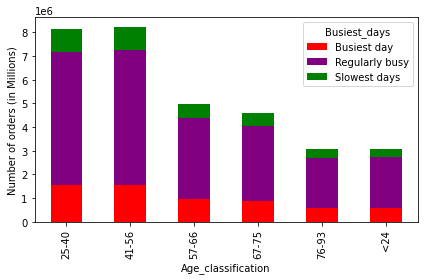

In [308]:
age_busiest_bar = age_busiest_bar.plot.bar(stacked=True, color = ['red','purple', 'green'], ylabel= 'Number of orders (in Millions)')
plt.tight_layout()     

In [309]:
age_busiest_bar.figure.savefig(os.path.join(path, '06 viz', 'Visual', 'customer_agebusy.png'))

In [310]:
age_busiest_bar2= pd.crosstab(df_ords_prods_custs_merge['Age_classification'], df_ords_prods_custs_merge['busiest_period_of_day'], dropna = False)

In [311]:
age_busiest_bar2

busiest_period_of_day,Average orders,Fewest orders,Most orders
Age_classification,,,
25-40,670467,6785509,699882
41-56,673367,6852329,699244
57-66,415914,4156841,421690
67-75,376534,3824497,393714
76-93,248694,2563490,260127
<24,253478,2570008,262853


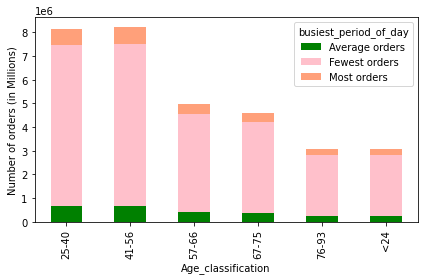

In [312]:
age_busiest_bar2 = age_busiest_bar2.plot.bar(stacked=True, color = ['green','pink', 'lightsalmon'], ylabel= 'Number of orders (in Millions)')
plt.tight_layout()

# 7, Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [313]:
# 7, Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
df_ords_prods_custs_merge.dtypes

order_id                   float64
user_id                    float64
order_number               float64
orders_day_of_week         float16
order_hour_of_day          float16
days_since_prior_order     float64
product_id                 float64
add_to_cart_order          float64
product_name              category
aisle_id                   float64
department_id              float16
prices                     float16
price_range_loc           category
busiest_day               category
Busiest_days              category
busiest_period_of_day     category
max_order                  float64
loyalty_flag              category
spending                   float64
spending_flag             category
frequency                  float16
frequency_flag            category
surname                     object
gender                    category
state                       object
age                          int64
date_joined                 object
n_dependants                 int16
fam_status          

In [314]:
df_ords_prods_custs_merge['Top_5_department'] = df_ords_prods_custs_merge['Top_5_department'].astype('category')

In [315]:
df_ords_prods_custs_merge[['Top_5_department']].dtypes

Top_5_department    category
dtype: object

In [316]:
department_record = df_ords_prods_custs_merge.groupby('department_name').agg({'prices': ['mean', 'min', 'max']})

In [317]:
department_record

prices                     
                      mean       min        max
department_name                                
alcohol           8.140625  1.000000  15.000000
babies            7.636719  1.000000  15.000000
bakery            7.855469  1.000000  15.000000
beverages         7.679688  1.000000  15.000000
breakfast         8.031250  1.000000  14.898438
bulk              8.351562  1.400391  14.101562
canned goods      7.539062  1.000000  15.000000
dairy eggs        8.335938  1.000000  15.000000
deli              7.777344  1.000000  15.000000
dry goods pasta   7.351562  1.000000  15.000000
frozen            7.738281  1.000000  15.000000
households        7.382812  1.000000  15.000000
international     7.683594  1.000000  15.000000
meat seafood     16.296875  8.000000  25.000000
missing           8.664062  1.000000  15.000000
other             6.992188  1.099609  15.000000
pantry            8.007812  1.000000  20.000000
personal care     7.996094  1.000000  15.000000
pets              7.890625  1.000000  15.000000
produce           7.980469  1.000000  15.000000
snacks            4.277344  1.599609   7.000000

In [318]:
age_price = df_ords_prods_custs_merge.groupby('Age_classification').agg({'prices': ['mean', 'min', 'max']})

In [319]:
age_price

prices           
                        mean  min   max
Age_classification                     
25-40               7.785156  1.0  25.0
41-56               7.789062  1.0  25.0
57-66               7.800781  1.0  25.0
67-75               7.792969  1.0  25.0
76-93               7.789062  1.0  25.0
<24                 7.789062  1.0  25.0

In [320]:
during_price = df_ords_prods_custs_merge.groupby('during_day').agg({'prices': ['mean', 'min', 'max']})

In [321]:
during_price

prices           
                mean  min   max
during_day                     
Afternoon   7.800781  1.0  25.0
Evening     7.804688  1.0  25.0
Morning     7.773438  1.0  25.0

In [322]:
sales_by_income = df_ords_prods_custs_merge.groupby('income_range').agg({'prices' : ['min', 'mean', 'max']})

In [323]:
sales_by_income

prices                
                 min      mean   max
income_range                        
025000-040000    1.0  6.496094  25.0
040000-080000    1.0  7.660156  25.0
080000-120000    1.0  7.964844  25.0
120000-160000    1.0  7.964844  25.0
160000-210000    1.0  7.957031  25.0
210000-523000    1.0  7.777344  25.0
523000+          1.0  7.636719  25.0

In [324]:
parents_buys = df_ords_prods_custs_merge.groupby('parental_status').agg({'prices': ['mean', 'min', 'max']})

In [325]:
parents_buys

prices           
                     mean  min   max
parental_status                     
not parent       7.789062  1.0  25.0
parent           7.792969  1.0  25.0

In [326]:
customer_rec_price = df_ords_prods_custs_merge.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

In [327]:
customer_rec_price

prices           
                      mean  min   max
customer_profile                     
Others            7.792969  1.0  25.0
Single adult      7.773438  1.0  25.0
Young parent      7.785156  1.0  25.0

In [328]:
customer_rec_days = df_ords_prods_custs_merge.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [329]:
customer_rec_days

days_since_prior_order           
                                   mean  min   max
customer_profile                                  
Others                        11.137295  0.0  30.0
Single adult                  11.257074  0.0  30.0
Young parent                  11.143601  0.0  30.0

In [330]:
customer_rec_max = df_ords_prods_custs_merge.groupby('customer_profile').agg({'max_order': ['mean', 'min', 'max']})

In [331]:
customer_rec_max

max_order            
                       mean  min    max
customer_profile                       
Others            33.989132  4.0  100.0
Single adult      33.566875  4.0  100.0
Young parent      33.820884  4.0  100.0

# 8, Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
# 9, Produce suitable charts to illustrate your results and export them in your project folder.

In [332]:
crosstab_customeregion = pd.crosstab(df_ords_prods_custs_merge['customer_profile'], df_ords_prods_custs_merge['region'], dropna = False)

In [333]:
crosstab_customeregion

region,Midwest,Northeast,South,West
customer_profile,,,,
Others,6111886,4595148,8119713,7169846
Single adult,373883,299536,534533,447519
Young parent,1166766,870148,1574952,1377338


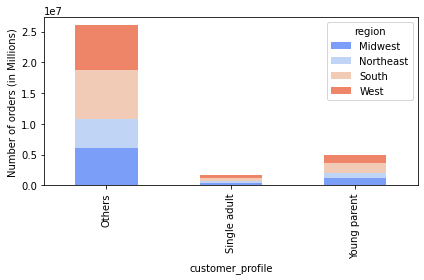

In [335]:
crosstab_customeregions = crosstab_customeregion.plot.bar(stacked = True, color = sns.color_palette('coolwarm',4), ylabel= 'Number of orders (in Millions)')
plt.legend(title = 'region',loc='upper right')
plt.tight_layout()

In [336]:
crosstab_customeregions.figure.savefig(os.path.join(path, '07 real Viz', 'new visual', 'customeregions.png'))

In [337]:
crosstab_custome_region = pd.crosstab(df_ords_prods_custs_merge['customer_profile'], df_ords_prods_custs_merge['region'], dropna = False)

In [338]:
crosstab_custome_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Others,6111886,4595148,8119713,7169846
Single adult,373883,299536,534533,447519
Young parent,1166766,870148,1574952,1377338


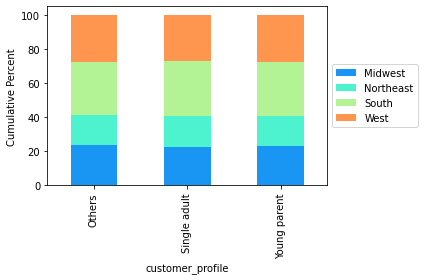

In [341]:
# 100 Percent stacked bar
crosstab_custome_region_percent = crosstab_custome_region.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('rainbow', 4), ylabel = 'Cumulative Percent')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [342]:
# customer profile of single adult and young parent and their top departments with name
crosstab_custom_topdept = pd.crosstab(df_ords_prods_custs_merge['customer_profile'], df_ords_prods_custs_merge['Top_5_department'], dropna = False)

In [343]:
crosstab_custom_topdept

Top_5_department,beverages,dairy eggs,frozen,produce,snacks
customer_profile,,,,,
Others,2145242,4297350,1780274,7554397,2297818
Single adult,136711,272307,110656,483281,146173
Young parent,406170,829090,343813,1441613,443559


In [344]:
crosstab_custom_topdept.to_clipboard()

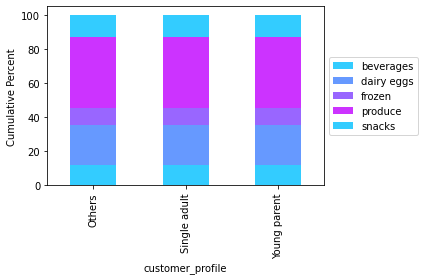

In [345]:
# 100 Percent stacked bar
crosstab_custom_topdept_percent = crosstab_custom_topdept.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4), ylabel= 'Cumulative Percent')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [346]:
crosstab_custom_topdept_percent.figure.savefig(os.path.join(path, '07 real Viz', 'new visual', 'custome_topdept.png'))

In [347]:
customerprofs = pd.crosstab(df_ords_prods_custs_merge['Top_5_department'], df_ords_prods_custs_merge['customer_profile'], dropna = False)

In [348]:
customerprofs

customer_profile,Others,Single adult,Young parent
Top_5_department,,,
beverages,2145242,136711,406170
dairy eggs,4297350,272307,829090
frozen,1780274,110656,343813
produce,7554397,483281,1441613
snacks,2297818,146173,443559


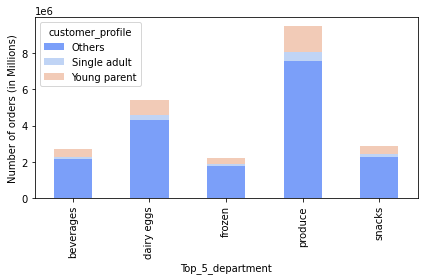

In [349]:
customerprofs_dept = customerprofs.plot.bar(stacked = True, color = sns.color_palette('coolwarm',4), ylabel= 'Number of orders (in Millions)')
plt.legend(title = 'customer_profile',loc='upper left')
plt.tight_layout()

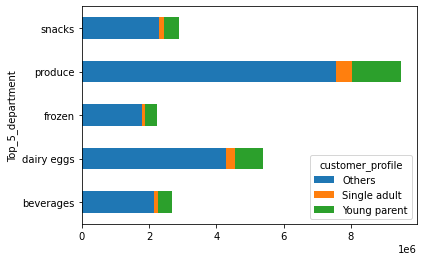

In [364]:
customerprofs_depttt = customerprofs.plot(kind = 'barh', stacked = True)

In [351]:
cutomerdept = customerprofs.div(customerprofs.sum(axis=1), axis=0)*100

In [352]:
cutomerdept

customer_profile,Others,Single adult,Young parent
Top_5_department,,,
beverages,79.804458,5.085742,15.109800
dairy eggs,79.599025,5.043893,15.357082
frozen,79.663478,4.951621,15.384901
produce,79.693692,5.098282,15.208026
snacks,79.576735,5.062181,15.361085


<AxesSubplot:ylabel='Top_5_department'>

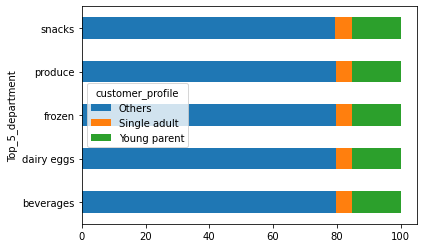

In [353]:
# 100 Percent stacked bar
cutomerdept.plot(kind = 'barh', stacked = True)

In [354]:
customerprofs_dept.figure.savefig(os.path.join(path, '07 real Viz', 'new visual', 'custprofile_depts.png'))

In [355]:
parental_top5dept = pd.crosstab(df_ords_prods_custs_merge['Top_5_department'], df_ords_prods_custs_merge['parental_status'], dropna = False)

In [356]:
parental_top5dept

parental_status,not parent,parent
Top_5_department,,
beverages,674442,2013681
dairy eggs,1349362,4049385
frozen,557160,1677583
produce,2375445,7103846
snacks,720798,2166752


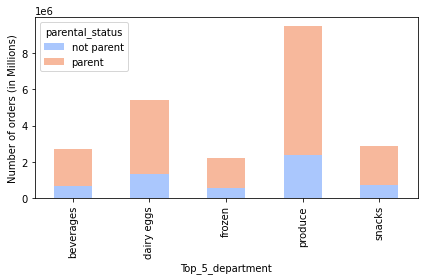

In [357]:
parental_top5depts = parental_top5dept.plot.bar(stacked = True, color = sns.color_palette('coolwarm',2), ylabel= 'Number of orders (in Millions)')
plt.legend(title = 'parental_status',loc='upper left')
plt.tight_layout()

In [358]:
parental_top5depts.figure.savefig(os.path.join(path, '07 real Viz', 'new visual', 'parents_depts.png'))

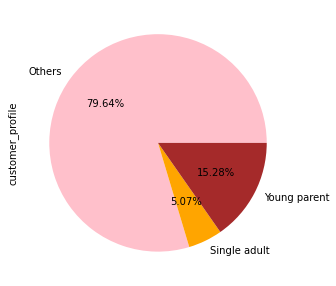

In [360]:
# Customer profile below 30 years old earning lesser than 400,000 and within the top 5 department
customerpro = df_ords_prods_custs_merge['customer_profile'].value_counts().sort_index().plot.pie(autopct='%.2f%%', figsize=(5,5), colors = ['pink','orange', 'brown'])

In [361]:
customerpro.figure.savefig(os.path.join(path, '07 real Viz', 'new visual', 'customerpercent.png'))

In [362]:
df_ords_prods_custs_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'price_range_loc', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending',
       'spending_flag', 'frequency', 'frequency_flag', 'surname', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       '_merge', 'region', 'exclusion_flag', 'Age_classification',
       'income_range', 'department_name', 'parental_status', 'during_day',
       'day_of_week', 'Top_5_department', 'customer_profile'],
      dtype='object')

# looking at the pie chart above, which shows the department distribution in percentage. one can see the difference within the departments, this shows that the department with the name 'produce' has the highest customers and more were from the young parents. Also the difference in percentage with 41.78% and while diary_eggs came second with 23.80%

In [363]:
df_ords_prods_custs_merge.to_pickle(os.path.join(path,'Last Script', 'New script','part1_coding_report_custprofiles.pkl'))

In [365]:
df_ords_prods_custs_merge.to_pickle(os.path.join(path,'Last Script', 'New script','Final_coding_report_customerprofiles.pkl'))